##Importar la Data

In [0]:
import pandas as pd

In [53]:
df = pd.read_csv("iris-data.csv")
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
df['Class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Class, dtype: int64

##Separar la Data

In [0]:
X = df.drop('Class', axis=1)
y = df['Class']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)


##Normalizar Datos

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

##Estandarizar Datos

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

##KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

##Evaluar Score

In [61]:
classifier.score(X_train,y_train)

0.9583333333333334

In [62]:
classifier.score(X_test,y_test)

1.0

##Diagrama Voronoid

In [0]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.colors import ListedColormap

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() 
le = le.fit(df['Class'])
df['Class'] = le.transform(df['Class'])

In [51]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [0]:
X = df[['sepal-length','sepal-width']]
y = df['Class']

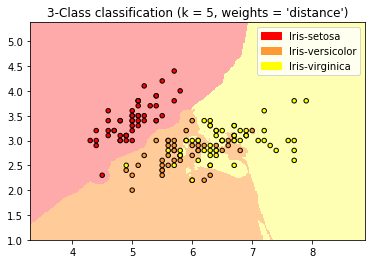

In [52]:
n_neighbors=5
weights='distance'
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00'])
h = .02
# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X['sepal-length'].min() - 1, X['sepal-length'].max() + 1
y_min, y_max = X['sepal-width'].min() - 1, X['sepal-width'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X['sepal-length'], X['sepal-width'], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='Iris-setosa')
patch1 = mpatches.Patch(color='#ff9933', label='Iris-versicolor')
patch2 = mpatches.Patch(color='#FFFF00', label='Iris-virginica')
plt.legend(handles=[patch0, patch1, patch2])
 
    
plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
 
plt.show()